<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/main/TP_Parte_1_1__Gr23_v_2022_04_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1 - Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

# Ejercicio 1 - Análisis descriptivo - Consigna

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### 1. Seleccionar las columnas relevantes para analizar

In [ ]:
#Importamos las librerías que necesitamos para trabajar
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
seaborn.set_context('talk')
pd.options.display.float_format = '{:,.1f}'.format

In [ ]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Para responder a la pregunta de cuáles son las variables de interés, comenzamos revisando las columnas de nuestro dataset. Vemos la cantidad de nulos, de ceros y de datos únicos para cada variable:

In [ ]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [ ]:
pd.options.display.float_format = '{:,.1f}'.format
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,profile_gender,0,0.0,0,0.0,3,object
1,profile_age,0,0.0,0,0.0,50,int64
2,work_country,0,0.0,0,0.0,1,object
3,work_province,0,0.0,0,0.0,25,object
4,profile_years_experience,0,0.0,318,0.1,59,float64
5,work_years_in_company,0,0.0,1538,0.3,45,float64
6,work_years_in_current_position,0,0.0,1324,0.2,43,float64
7,work_people_in_charge_of,0,0.0,4592,0.8,51,int64
8,profile_studies_level,0,0.0,0,0.0,7,object
9,profile_studies_level_state,0,0.0,0,0.0,3,object


Luego de esta exploración de las columnas del dataset, sabemos que nuestras columnas o variables de interés para responder a la pregunta son: 
1. Lenguajes de programación: `tools_programming_languages`, y 
2. Salario (Bruto o Neto): `salary_monthly_BRUTO` y `salary_monthly_NETO`
En la tabla anterior vimos que el salario Neto tiene 212 valores nulos, con lo cual parece mejor opción para el análisis considerar el salario Bruto por ser mas completo.

In [ ]:
#armamos un dataset con nuestras columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

### 2. Seleccionar las filas relevantes para analizar

#### Variable Programming Languages

Sabemos que la columna que contiene información sobre los lenguajes de programación utilizados (`tools_programming_languages`), contiene respuestas en formato texto (string) con los lenguajes seleccionados separados por comas. Necesitamos separarlos para poder hacer un análisis comparativo entre lenguajes.

In [ ]:
#Vemos las primeras 3 filas a modo de ejemplo
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes líneas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen. Además, crea un nuevo dataset llamado `df_lang` en el que agrega a nuestro dataset `relevant_columns` recientemente creado dos columnas nuevas: una llamada `cured_programming_languages` y otra (creada a partir de esta última) llamada `programming_language`. 

In [ ]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('ninguno', '')\
    .replace('-', '')
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})


Vemos cómo quedó este nuevo dataset `df_lang` revisando sus primeras 5 filas.

---



In [ ]:
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."


Se observa que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

A continuación revisamos la cantidad de veces que se repite cada lenguaje en nuestro dataframe `df_lang` para empezar a aproximarnos a los lenguajes de programación más frecuentemente manejados por los encuestados. Vemos los 20 lenguajes más frecuentes entre los encuestados:

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


Podemos ver estos datos en un gráfico de barras: 

Text(0.5, 1.0, 'Lenguajes de programación o tecnologías que manejan')

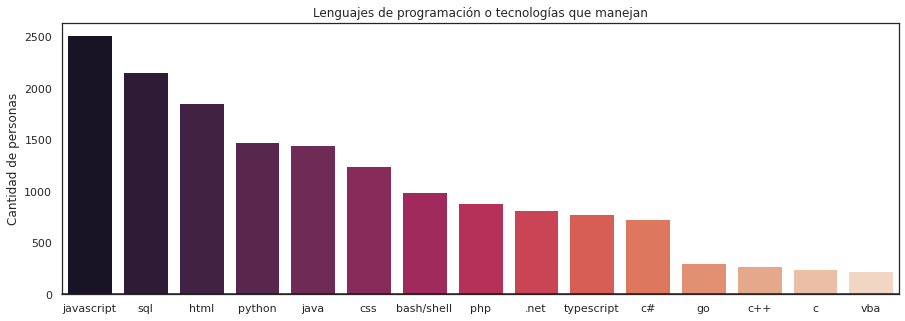

In [ ]:
seaborn.set_theme(style="white")
aux = language_count[:15]
filtered_language_count = aux.sort_values(by='frequency',ascending=False,inplace=False)

x = numpy.array(list(filtered_language_count['language']))
y1 = numpy.array(list(filtered_language_count['frequency']))
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Cantidad de personas")
ax1.set_title("Lenguajes de programación o tecnologías que manejan")

En el gráfico se ve una caída fuerte en la frecuencia de encuestados a partir del lenguaje `go`. En la tabla anterior podemos ver que 734 de los encuestados dijeron programar en `c#`, representando el 12% del total de encuestados (6095) mientras que la cantidad de encuestados que programa en `go` solo representa el 5% de la muestra. Por esto decidimos cortar nuestro listado de programas relevantes en los 11 primeros.

In [ ]:
#Redefinimos los lenguajes más frecuentes para que sean 11
aux1 = language_count[:11]
filtered_language_count = aux1.sort_values(by='frequency',ascending=False,inplace=False)
x = numpy.array(list(filtered_language_count['language']))

Filtramos entonces las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages` que contiene los 11 lenguajes seleccionados y creamos un nuevo dataset a partir de `df_lang` llamado `filtered_df_lang`.

In [ ]:
#Creamos nuestro dataset filtrado y vemos las primeras 5 filas
interesting_languages = x
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."


#### Variable Salario Bruto

Empecemos viendo cómo se distribuye la variable `salary_monthly_BRUTO`. A continuación se muestran algunas medidas de tendencia central.

In [ ]:
df[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"6,095.0"
mean,"124,059.0"
std,"122,912.0"
min,1.0
25%,"61,595.0"
50%,"96,000.0"
75%,"145,000.0"
max,"2,180,000.0"


Comenzamos a notar que el sueldo mínimo es de $1, dato que consideramos equivalente a un "Ns/Nc". Además, el sueldo máximo es 17 veces la media. Veamos un histograma de frecuencias del Salario Bruto: 

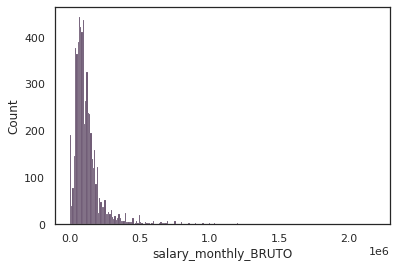

In [ ]:
seaborn.set_theme(style="white", palette="rocket")
x = df['salary_monthly_BRUTO']
ax = seaborn.histplot(x) #

Como ya se notaba en la tabla, en el gráfico observamos una fuerte presencia de valores extremos (outliers) que están distorsionando los resultados. Para trabajar con una base más limpia cuidando la representatividad de los datos, tomamos un código que remueve las filas para las cuales la diferencia absoluta entre el salario bruto y la media es menor o igual que 2.5 veces el desvío estándar del salario.

In [ ]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [ ]:
df_filtered = clean_outliers_sd(df,'salary_monthly_BRUTO')

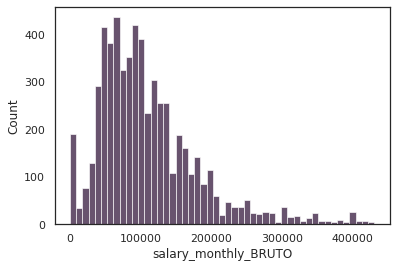

In [ ]:
seaborn.set_theme(style="white", palette="rocket")
d = df_filtered['salary_monthly_BRUTO']
ad = seaborn.histplot(d) #

Luego de aplicar el filtro mencionado, el gráfico muestra una mejoría en relación a los outliers que se encontraban por la derecha de la distribución. Sin embargo, todavía no hemos solucionado el problema de los valores bajos del salario. Esto se debe a que el desvío estándar del salario bruto es muy grande y la cuenta no llega a filtrar los valores pequeños.

Analicemos nuevamente las medidas de tendencia central con la base filtrada:

In [ ]:
df_filtered[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"5,946.0"
mean,"110,156.0"
std,"72,303.0"
min,1.0
25%,"60,240.0"
50%,"95,000.0"
75%,"140,000.0"
max,"431,000.0"


Vemos que el máximo se redujo de \$2 millones a \$431 mil, y confirmamos que los valores "$1" siguen en la base filtrada. Analicemos ahora los percentiles de nuestra distribución para ver cuántos valores dejamos afuera con dicho filtro.

In [ ]:
salary_col='salary_monthly_BRUTO'
k1 = 97
k2 = 97.5
k3 = 97.56
percentile_x1 = df[salary_col].quantile(k1 / 100).round()
percentile_x2 = df[salary_col].quantile(k2 / 100).round()
percentile_x3 = df[salary_col].quantile(k3 / 100).round()
print('Percentil {} de la columna {}: {}'.format(k1, salary_col, percentile_x1))
print('Percentil {} de la columna {}: {}'.format(k2, salary_col, percentile_x2))
print('Percentil {} de la columna {}: {}'.format(k3, salary_col, percentile_x3))



Percentil 97 de la columna salary_monthly_BRUTO: 400000.0
Percentil 97.5 de la columna salary_monthly_BRUTO: 424650.0
Percentil 97.56 de la columna salary_monthly_BRUTO: 432992.0


Como se observa en el resultado del código, los salarios mayores a 431.000 (el valor máximo de nuestra base filtrada) representan menos del 2.5% de la muestra total.   

Para remover los valores pequeños, usamos el mismo código para analizar percentiles pequeños de la variable:

In [ ]:
salary_col='salary_monthly_BRUTO'
k1 = 2
k2 = 3
k3 = 3.5
percentile_x1 = df[salary_col].quantile(k1 / 100).round()
percentile_x2 = df[salary_col].quantile(k2 / 100).round()
percentile_x3 = df[salary_col].quantile(k3 / 100).round()
n_above = len(df[df[salary_col] > percentile_x3])
print('Percentil {} de la columna {}: {}'.format(k1, salary_col, percentile_x1))
print('Percentil {} de la columna {}: {}'.format(k2, salary_col, percentile_x2))
print('Percentil {} de la columna {}: {}'.format(k3, salary_col, percentile_x3))

print('% de datos mayor que percentil {}: {}'.format(k3, n_above / len(df)))

Percentil 2 de la columna salary_monthly_BRUTO: 116.0
Percentil 3 de la columna salary_monthly_BRUTO: 4874.0
Percentil 3.5 de la columna salary_monthly_BRUTO: 14645.0
% de datos mayor que percentil 3.5: 0.9648892534864643


Los resultados muestran que si removemos los sueldos menores o iguales a \$14.645 estaríamos quitando solamente el 3.5% de los datos. 

Tomamos la base filtrada y removemos los valores menores o iguales a dicho valor:

In [ ]:
df_filtered_new = df_filtered[df_filtered['salary_monthly_BRUTO'] >= 14645]

Revisamos ahora las medidas de tendencia central resultantes:

In [ ]:
df_filtered_new[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"5,732.0"
mean,"114,205.0"
std,"70,476.0"
min,"15,000.0"
25%,"65,000.0"
50%,"98,000.0"
75%,"142,000.0"
max,"431,000.0"


Podemos ver que la cuenta de datos bajó a 5,732, y que el mínimo es ahora \$15.000, que parece un salario más realista para 2020 (el Salario Mínimo Vital y Móvil para el 2020 estaba próximo a los \$17 mil pesos). A su vez, estamos trabajando con el 94% de la muestra, con lo cual entendemos que nuestros datos siguen siendo representativos.

## 3. Seleccionar métricas y métodos de análisis

Ahora veamos medidas de tendencia central y de dispersión de la variable de interés `salary_monthly_BRUTO` con respecto a estos 11 lenguajes de programación filtrados en el punto anterior.

Antes recordamos que la tabla que creamos con los lenguajes curados todavía incluye los outliers. Los filtramos.

In [ ]:
df_lang_mins = filtered_df_lang[filtered_df_lang['salary_monthly_BRUTO'] >= 14645]
df_lang_new = df_lang_mins[df_lang_mins['salary_monthly_BRUTO'] < 431000]

Graficamos ahora la media del Salario Bruto para la base filtrada.

In [ ]:
language_mean = df_lang_new.groupby('programming_language').mean()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'mean'})

Text(0.5, 1.0, 'Media de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes')

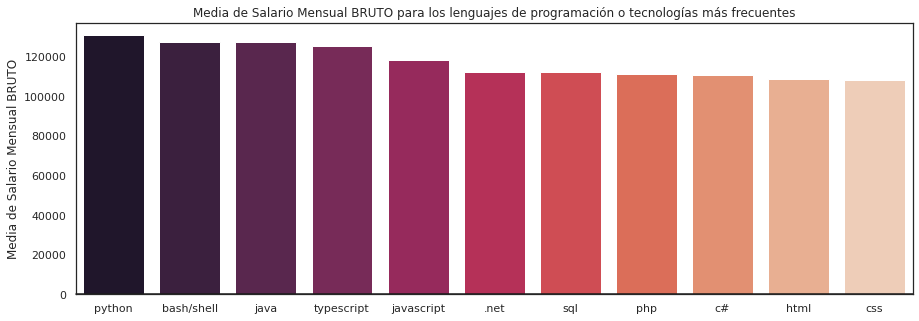

In [ ]:
plot_order=language_mean.groupby('language')['mean'].sum().sort_values(ascending=False).index.values

seaborn.set_theme(style="white")
x = numpy.array(list(language_mean['language']))
y = numpy.array(list(language_mean['mean']))
ord = plot_order
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y, palette="rocket", ax=ax1, order = ord)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Media de Salario Mensual BRUTO")
ax1.set_title("Media de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes")

De acuerdo con un análisis de la media, entendemos que los lenguajes mejor remunerados parecen ser `python`, `bash/shell` y `java`. 

Usando la media como medida de comparación, el salario promedio del lenguaje mejor remunerado (`python`: \$130mil) es un 21% mayor que el peor remunerado (`css`: \$108mil). En otras palabras, quienes saben programar `css` podrían aumentar un 21% su sueldo si aprendieran a programar en `python`.

Para no quedarnos únicamente con la media, sabiendo que trabajamos con distribuciones desiguales, analizamos las distribuciones por lenguaje. Para esto, la siguiente tabla muestra algunas medidas que nos ayudan a describirlas:

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
df_lang_new.groupby('programming_language').describe().round()

salary_monthly_BRUTO                               \
                                    count    mean    std    min    25%   
programming_language                                                     
.net                                  778 112,207 67,914 16,000 65,955   
bash/shell                            935 127,108 71,933 17,000 74,500   
c#                                    695 110,508 67,988 16,000 65,000   
css                                 1,175 108,235 70,531 16,000 60,324   
html                                1,750 108,534 70,720 16,000 61,480   
java                                1,379 126,904 72,011 15,000 72,244   
javascript                          2,359 118,059 75,986 16,000 65,000   
php                                   842 110,895 74,313 17,000 60,000   
python                              1,393 130,454 76,498 17,000 76,000   
sql                                 2,041 111,828 68,250 15,000 64,600   
typescript                            724 125,028 76,000 17,000 70,000   

                                              
                         50%     75%     max  
programming_language                          
.net                  96,000 140,000 415,000  
bash/shell           114,311 160,000 420,000  
c#                    93,000 135,000 400,000  
css                   90,000 135,000 430,000  
html                  90,000 132,750 430,000  
java                 112,000 163,000 430,000  
javascript           100,000 147,000 430,000  
php                   91,350 140,000 430,000  
python               112,000 161,000 425,000  
sql                   96,000 140,000 430,000  
typescript           108,000 155,000 425,000

La tabla es algo difícil de leer porque tiene muchos datos. Sin embargo, a simple vista notamos que el salario bruto mínimo y máximo es similar para los 11 lenguajes filtrados. Asimismo, se observa que la media está bastante alejada de la mediana (percentil 50%) para varios lenguajes. Esto sucede porque las distribuciones siguen sesgadas hacia la derecha (mediana menor a la media).

Para ver sus distribuciones en forma gráfica, usamos la herramienta boxplot:

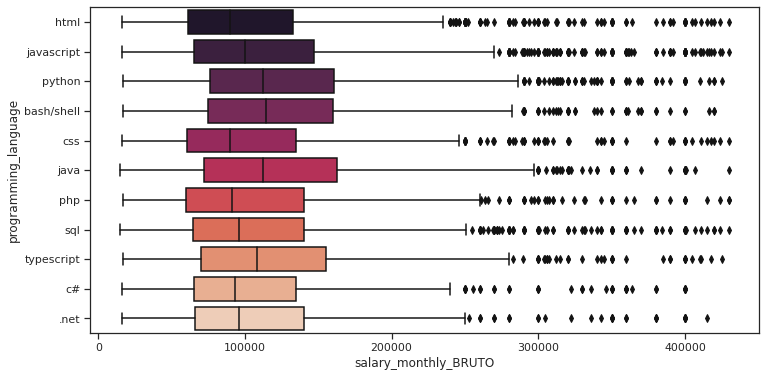

In [ ]:
seaborn.set_theme(style="ticks")
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_lang_new, x="salary_monthly_BRUTO", y="programming_language",
                palette="rocket")
plt.ticklabel_format(style='plain', axis='x')

Como se mencionó, aún después de haber filtrado la base, las distribuciones siguen sesgadas. Vemos la mediana graficada como medida más robusta y menos influenciable por datos extremos.

In [ ]:
language_medians = df_lang_new.groupby('programming_language').median()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'median'})

Text(0.5, 1.0, 'Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes')

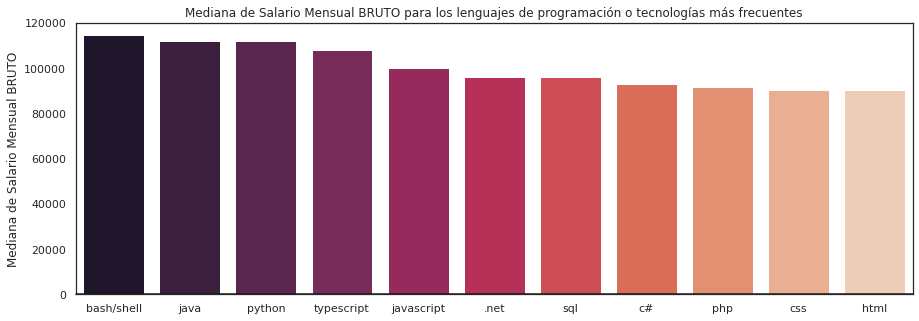

In [ ]:
plot_order=language_medians.groupby('language')['median'].sum().sort_values(ascending=False).index.values

seaborn.set_theme(style="white")
x = numpy.array(list(language_medians['language']))
y = numpy.array(list(language_medians['median']))
ord = plot_order
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y, palette="rocket", ax=ax1, order = ord)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mediana de Salario Mensual BRUTO")
ax1.set_title("Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes")

En la gráfica se observa que `bash/shell` reemplaza a `phyton` como el lenguaje mejor remunerado. No obstante, `phyton` y `java` continúan en el top 3. Los lenguajes `css`, `html` y `php` son los que menos remuneración perciben entre los 11 más frecuentes. Cuando analizábamos la media, `php` no estaba entre los 3 lenguajes peor remunerados.

Usando la mediana como medida de comparación, quienes programan en `css` podrían considerar aprender `bash/shell` y posiblemente incrementarían su salario en un 27% (la mediana del salario de dicho lenguaje es de \$114mil, mientras que la de `css` es de \$90mil).

Pero ¿qué pasa si en esa selección de los lenguajes mas populares estamos dejando de lado subgrupos mas pequeños de encuestados que programan en un lenguaje poco común y que justamente por su escasez son mejor remunerados? 

Para analizar el total de los sueldos brutos por lenguaje, sin tener en cuenta qué tan populares son, creamos una tabla completa con las medianas por lenguaje. Es necesario retomar recuperar el dataframe `df_lang`, que no tenía el filtro de los 11 más populares, y quitarle los outliers de la variable salario mensual bruto.

In [ ]:
df_lang_mins_todos = df_lang[df_lang['salary_monthly_BRUTO'] >= 14645]
df_lang_new_todos = df_lang_mins_todos[df_lang_mins_todos['salary_monthly_BRUTO'] < 431000]

language_medians_complete = df_lang_new_todos.groupby('programming_language').median()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'median'})

Luego ordenamos la tabla de medianas misma de mayor a menor y filtramos los mejores 15. Además agregamos la frecuencia para entender la importancia de dichos lenguajes. 

In [ ]:
sorted_by_median = language_medians_complete.sort_values(ascending=False,by='median').reset_index()
top15=sorted_by_median[:15]
ord = numpy.array(list(top15['language']))

In [ ]:
language_count_medians = language_count[language_count.language.isin(ord)]

In [ ]:
summary=top15.set_index('language').join(language_count_medians.set_index('language'),lsuffix=1).reset_index()
summary=summary.drop(summary.columns[[1]], axis=1)
summary

,language,median,frequency
0,powercli,"350,000",1
1,nim,"331,000",1
2,react,"300,000",1
3,hacklang,"264,000",1
4,rust,"262,000",18
5,rexx,"240,000",1
6,mongodb,"235,000",1
7,verilog,"216,000",1
8,cliente,"215,000",1
9,plataforma,"215,000",1


En esta tabla vemos que los valores medios de la variable salario mensual bruto coinciden con lenguajes de programación poco representativos (frecuencia 1). Es complicado hacer un análisis cuando sólo 1 persona brindó información. 

Veamos si podemos quedarnos únicamente con aquellos lenguajes que tengan al menos 100 casos.

In [ ]:
summary1=sorted_by_median.set_index('language').join(language_count.set_index('language'),lsuffix=1).reset_index()
summary1=summary1.drop(summary1.columns[[1]], axis=1)
summary_100=summary1[summary1['frequency'] >= 100]
summary_100


,language,median,frequency
19,scala,"170,000",115
26,go,"152,575",306
27,kotlin,"150,000",191
34,swift,"136,500",103
35,groovy,"135,608",169
41,ruby,"125,000",157
65,bash/shell,"114,311",993
68,java,"112,000",1453
69,python,"112,000",1475
77,typescript,"108,000",779


La primera observación es que de la lista original que tiene 190 lenguajes de programación, solo 20 son manejados por al menos 100 encuestados.

Además, se observa que al incluir lenguajes menos populares, los resultados cambiaron significativamente. Hay un subgrupo de la muestra que maneja algunos lenguajes poco frecuentes y que están mostrando salarios mensuales brutos superiores al resto. En primer lugar se sitúa `scala` con una mediana de \$170mil pesos. 

Tomemos estos como los mejores 20 y veámos sus distribuciones graficadas.

In [ ]:
mejores_20_lenguajes = summary_100['language']
df_lang_new_100 = df_lang_new_todos[df_lang_new_todos.programming_language.isin(mejores_20_lenguajes)]

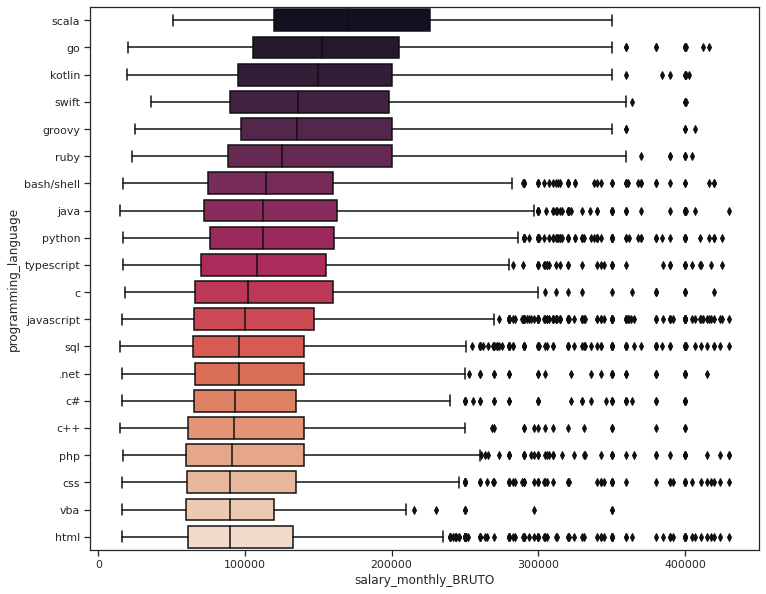

In [ ]:
seaborn.set_theme(style="ticks")
plt.figure(figsize=(12, 10))
seaborn.boxplot(data=df_lang_new_100, x="salary_monthly_BRUTO", y="programming_language",
                palette="rocket", order=summary_100['language'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
df_lang_new_100.groupby('programming_language').describe().round().loc[summary_100['language']]

salary_monthly_BRUTO                                \
                                    count    mean    std    min     25%   
programming_language                                                      
scala                                 103 177,368 73,201 51,000 120,000   
go                                    278 169,972 85,361 20,000 105,250   
kotlin                                177 160,036 84,858 19,925  95,000   
swift                                  94 155,026 86,463 36,000  90,000   
groovy                                161 153,469 83,051 25,000  97,645   
ruby                                  131 155,750 95,254 22,891  88,500   
bash/shell                            935 127,108 71,933 17,000  74,500   
java                                1,379 126,904 72,011 15,000  72,244   
python                              1,393 130,454 76,498 17,000  76,000   
typescript                            724 125,028 76,000 17,000  70,000   
c                                     223 125,392 83,483 18,000  66,232   
javascript                          2,359 118,059 75,986 16,000  65,000   
sql                                 2,041 111,828 68,250 15,000  64,600   
.net                                  778 112,207 67,914 16,000  65,955   
c#                                    695 110,508 67,988 16,000  65,000   
c++                                   248 112,596 75,161 15,000  61,000   
php                                   842 110,895 74,313 17,000  60,000   
css                                 1,175 108,235 70,531 16,000  60,324   
vba                                   214  96,675 52,702 16,000  60,000   
html                                1,750 108,534 70,720 16,000  61,480   

                                              
                         50%     75%     max  
programming_language                          
scala                170,000 226,357 350,000  
go                   152,575 204,750 416,500  
kotlin               150,000 200,000 402,500  
swift                136,500 198,250 400,500  
groovy               135,608 200,000 407,000  
ruby                 125,000 200,000 405,000  
bash/shell           114,311 160,000 420,000  
java                 112,000 163,000 430,000  
python               112,000 161,000 425,000  
typescript           108,000 155,000 425,000  
c                    102,000 160,000 420,000  
javascript           100,000 147,000 430,000  
sql                   96,000 140,000 430,000  
.net                  96,000 140,000 415,000  
c#                    93,000 135,000 400,000  
c++                   92,500 140,384 400,000  
php                   91,350 140,000 430,000  
css                   90,000 135,000 430,000  
vba                   90,000 120,000 350,000  
html                  90,000 132,750 430,000

Podemos ver que si bien el lenguaje `scala` tiene salarios bastante más dispersos (la diferencia entre el mínimo y el máximo es significativamente mayor al del resto de las distribuciones), el 50% de los encuestados que manejan dicho lenguaje cobran más de \$170mil pesos.

Los lenguajes `go` y `kotlin` son los que completan el top 3 de salarios mejor remunerados: 50% de los encuestados cobran por mes al menos \$150mil pesos.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
